In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import TypeVar

In [7]:
car_files = ['car_clipped_1.csv', 'car_clipped_2.csv', 'car_clipped_3.csv', 'car_clipped_4.csv', 'car_clipped_5.csv']
aceta_files = ['aceta_clipped_1.csv', 'aceta_clipped_2.csv', 'aceta_clipped_3.csv', 'aceta_clipped_4.csv', 'aceta_clipped_5.csv']
car_aceta_aceph_files = ['car_aceta_aceph_clipped_1.csv', 'car_aceta_aceph_clipped_2.csv', 'car_aceta_aceph_clipped_3.csv', 'car_aceta_aceph_clipped_4.csv', 'car_aceta_aceph_clipped_5.csv']

In [8]:
i = 0
for file in car_files:
    df = pd.read_csv(file, header=None)
    globals()["car_clipped_" + str(i+1)] = df.iloc[1:, 0:1410].to_numpy(dtype=np.float64, copy=True)
    i += 1

In [9]:
i = 1
for file in aceta_files:
    df = pd.read_csv(file, header=None)
    globals()["aceta_clipped_" + str(i)] = df.iloc[1:, 0:1410].to_numpy(dtype=np.float64, copy=True)
    i += 1

In [10]:
i = 1
for file in car_aceta_aceph_files:
    df = pd.read_csv(file, header=None)
    globals()["car_aceta_aceph_clipped_" + str(i)] = df.iloc[1:, 0:1410].to_numpy(dtype=np.float64, copy=True)
    i += 1

In [ ]:
[k for k in globals().keys() if 'car_clipped_' in k]

In [25]:
est_bg = np.array([0.8200562018588456*x + -267.98234120955186 for x in np.arange(380, 800, 1)])

In [27]:
def find_line(point_1: tuple, point_2: tuple):
    points = [point_1, point_2]
    x_coords, y_coords = zip(*points)
    A = np.vstack([x_coords, np.ones(len(x_coords))]).T
    m, b = np.linalg.lstsq(A, y_coords)[0]
    return m, b
#     print("Line Solution is y = {m}x + {b}".format(m=m,b=b))

In [28]:
car_line_1 = np.zeros((8, 2))
car_line_2 = np.zeros((8, 2))
car_line_3 = np.zeros((8, 2))
car_line_4 = np.zeros((8, 2))
car_line_5 = np.zeros((8, 2))

In [32]:
j = 0
for i in range(len(car_clipped_1)):
    car_line_1[j, 0], car_line_1[j, 1] = find_line((380, car_clipped_1[j, 380]), (800, car_clipped_1[j, 800]))
    car_line_2[j, 0], car_line_2[j, 1] = find_line((380, car_clipped_2[j, 380]), (800, car_clipped_2[j, 800]))
    car_line_3[j, 0], car_line_3[j, 1] = find_line((380, car_clipped_3[j, 380]), (800, car_clipped_3[j, 800]))
    car_line_4[j, 0], car_line_4[j, 1] = find_line((380, car_clipped_4[j, 380]), (800, car_clipped_4[j, 800]))
    car_line_5[j, 0], car_line_5[j, 1] = find_line((380, car_clipped_5[j, 380]), (800, car_clipped_5[j, 800]))
    j += 1

/tmp/ipykernel_9811/2237887769.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m, b = np.linalg.lstsq(A, y_coords)[0]


In [37]:
for i in range(0, len(car_line_1)-1):
    car_line_1_complete[i] = np.array([car_line_1[i, 0]*x + car_line_1[i, 1] for x in np.arange(380, 800, 1)])
    car_line_2_complete[i] = np.array([car_line_2[i, 0]*x + car_line_2[i, 1] for x in np.arange(380, 800, 1)])
    car_line_3_complete[i] = np.array([car_line_3[i, 0]*x + car_line_3[i, 1] for x in np.arange(380, 800, 1)])
    car_line_4_complete[i] = np.array([car_line_4[i, 0]*x + car_line_4[i, 1] for x in np.arange(380, 800, 1)])
    car_line_5_complete[i] = np.array([car_line_5[i, 0]*x + car_line_5[i, 1] for x in np.arange(380, 800, 1)])

In [36]:
car_line_1_complete = np.zeros((8, 420))
car_line_2_complete = np.zeros((8, 420))
car_line_3_complete = np.zeros((8, 420))
car_line_4_complete = np.zeros((8, 420))
car_line_5_complete = np.zeros((8, 420))

In [41]:
car_corrected_1 = np.zeros((8, 420))
car_corrected_2 = np.zeros((8, 420))
car_corrected_3 = np.zeros((8, 420))
car_corrected_4 = np.zeros((8, 420))
car_corrected_5 = np.zeros((8, 420))

In [43]:
car_corrected_1 = car_clipped_1[:, 380:800] - car_line_1_complete[:, ]
car_corrected_2 = car_clipped_2[:, 380:800] - car_line_2_complete[:, ]
car_corrected_3 = car_clipped_3[:, 380:800] - car_line_3_complete[:, ]
car_corrected_4 = car_clipped_4[:, 380:800] - car_line_4_complete[:, ]
car_corrected_5 = car_clipped_5[:, 380:800] - car_line_5_complete[:, ]

In [63]:
car_corrected_peaks = [16, 152, 340, 390]

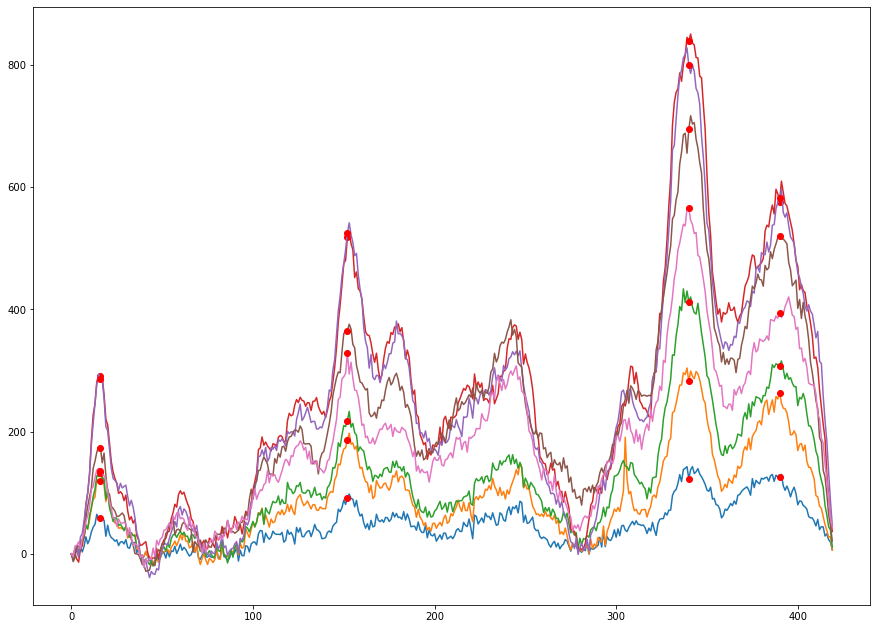

In [80]:
plt.figure(figsize=(15, 11))
for i in range(0, len(car_corrected_1) - 1):
    plt.plot(car_corrected_1[i])
    plt.plot(np.arange(0, 420, 1)[152], car_corrected_1[i, 152], 'ro')
    plt.plot(np.arange(0, 420, 1)[16], car_corrected_1[i, 16], 'ro')
    plt.plot(np.arange(0, 420, 1)[340], car_corrected_1[i, 340], 'ro')
    plt.plot(np.arange(0, 420, 1)[390], car_corrected_1[i, 390], 'ro')
plt.savefig('carbendazim_clipped.png', dpi=500)

In [66]:
car_intensity_1 = car_corrected_1[:, car_corrected_peaks]
car_intensity_2 = car_corrected_2[:, car_corrected_peaks]
car_intensity_3 = car_corrected_3[:, car_corrected_peaks]
car_intensity_4 = car_corrected_4[:, car_corrected_peaks]
car_intensity_5 = car_corrected_5[:, car_corrected_peaks]

In [69]:
car_intensity = np.zeros((5, 8, 4))

In [71]:
car_intensity[0] = car_corrected_1[:, car_corrected_peaks]
car_intensity[1] = car_corrected_2[:, car_corrected_peaks]
car_intensity[2] = car_corrected_3[:, car_corrected_peaks]
car_intensity[3] = car_corrected_4[:, car_corrected_peaks]
car_intensity[4] = car_corrected_5[:, car_corrected_peaks]

In [65]:
power = [2.71, 6.44, 11.41, 17.24, 23.48]

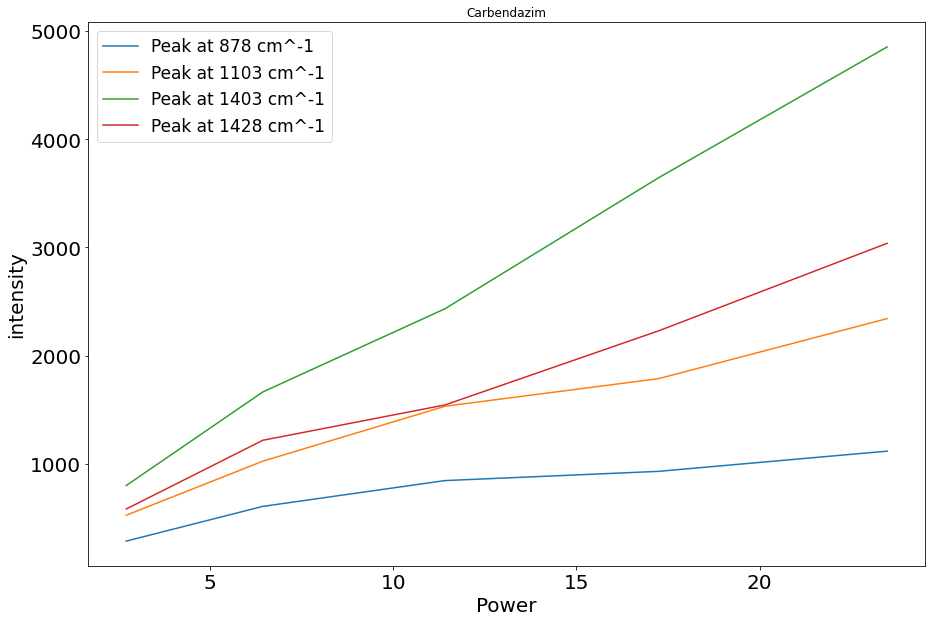

In [105]:
plt.figure(figsize=(15, 10))
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
plt.plot(power, car_intensity[:, 4, 0], label='Peak at 878 cm^-1')
plt.plot(power, car_intensity[:, 4, 1], label='Peak at 1103 cm^-1')
plt.plot(power, car_intensity[:, 4, 2], label='Peak at 1403 cm^-1')
plt.plot(power, car_intensity[:, 4, 3], label='Peak at 1428 cm^-1')
plt.title("Carbendazim")
plt.xlabel("Power", fontsize=20)
plt.ylabel("intensity", fontsize=20)
plt.legend(fontsize=17)
# plt.savefig('carbendazim_peak_power.png', dpi=500)

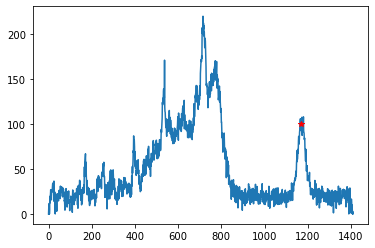

In [100]:
plt.plot(car_aceta_aceph_clipped_1[4])
plt.plot(np.arange(1, 1410, 1)[1169], car_aceta_aceph_clipped_1[4, 1169], 'r*')

In [ ]:
aceta_line_1 = np.zeros((8, 2))
aceta_line_2 = np.zeros((8, 2))
aceta_line_3 = np.zeros((8, 2))
aceta_line_4 = np.zeros((8, 2))
aceta_line_5 = np.zeros((8, 2))

In [ ]:
j = 0
for i in range(len(car_clipped_1)):
    car_line_1[j, 0], car_line_1[j, 1] = find_line((380, car_clipped_1[j, 380]), (800, car_clipped_1[j, 800]))
    car_line_2[j, 0], car_line_2[j, 1] = find_line((380, car_clipped_2[j, 380]), (800, car_clipped_2[j, 800]))
    car_line_3[j, 0], car_line_3[j, 1] = find_line((380, car_clipped_3[j, 380]), (800, car_clipped_3[j, 800]))
    car_line_4[j, 0], car_line_4[j, 1] = find_line((380, car_clipped_4[j, 380]), (800, car_clipped_4[j, 800]))
    car_line_5[j, 0], car_line_5[j, 1] = find_line((380, car_clipped_5[j, 380]), (800, car_clipped_5[j, 800]))
    j += 1

In [ ]:
for i in range(0, len(car_line_1)-1):
    car_line_1_complete[i] = np.array([car_line_1[i, 0]*x + car_line_1[i, 1] for x in np.arange(380, 800, 1)])
    car_line_2_complete[i] = np.array([car_line_2[i, 0]*x + car_line_2[i, 1] for x in np.arange(380, 800, 1)])
    car_line_3_complete[i] = np.array([car_line_3[i, 0]*x + car_line_3[i, 1] for x in np.arange(380, 800, 1)])
    car_line_4_complete[i] = np.array([car_line_4[i, 0]*x + car_line_4[i, 1] for x in np.arange(380, 800, 1)])
    car_line_5_complete[i] = np.array([car_line_5[i, 0]*x + car_line_5[i, 1] for x in np.arange(380, 800, 1)])